In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [2]:
zoo = pd.read_csv('C:/Users/Akshay/Downloads/zoo.csv')

In [3]:
zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [4]:
zoo.columns

Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')

In [5]:
zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [6]:
zoo.type.unique()

array([1, 4, 2, 7, 6, 5, 3], dtype=int64)

In [7]:
zoo.hair.unique()

array([1, 0], dtype=int64)

In [8]:
zoo.legs.unique()

array([4, 0, 2, 6, 8, 5], dtype=int64)

In [9]:
zoo.feathers.unique()

array([0, 1], dtype=int64)

In [10]:
zoo = zoo.drop('animal name' , axis =1)

In [11]:
zoo

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [12]:
zoo.dtypes

hair        int64
feathers    int64
eggs        int64
milk        int64
airborne    int64
aquatic     int64
predator    int64
toothed     int64
backbone    int64
breathes    int64
venomous    int64
fins        int64
legs        int64
tail        int64
domestic    int64
catsize     int64
type        int64
dtype: object

In [13]:
zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [14]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   hair      101 non-null    int64
 1   feathers  101 non-null    int64
 2   eggs      101 non-null    int64
 3   milk      101 non-null    int64
 4   airborne  101 non-null    int64
 5   aquatic   101 non-null    int64
 6   predator  101 non-null    int64
 7   toothed   101 non-null    int64
 8   backbone  101 non-null    int64
 9   breathes  101 non-null    int64
 10  venomous  101 non-null    int64
 11  fins      101 non-null    int64
 12  legs      101 non-null    int64
 13  tail      101 non-null    int64
 14  domestic  101 non-null    int64
 15  catsize   101 non-null    int64
 16  type      101 non-null    int64
dtypes: int64(17)
memory usage: 13.5 KB


In [15]:
zoo.duplicated().value_counts()

False    59
True     42
dtype: int64

In [16]:
#there are many similar values, this could be due to the fact that most animals belong to one class type

In [17]:
zoo.type.value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

# Data Visualization

<AxesSubplot:xlabel='type', ylabel='count'>

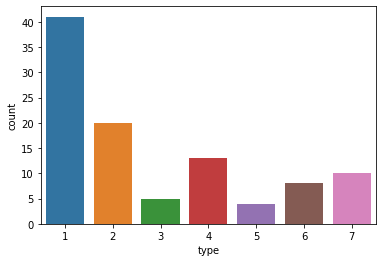

In [18]:
sns.countplot(x = zoo.type)

<AxesSubplot:xlabel='type', ylabel='count'>

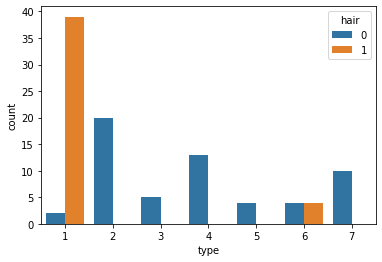

In [19]:
sns.countplot(x = zoo.type , hue = zoo.hair)

<AxesSubplot:xlabel='type', ylabel='count'>

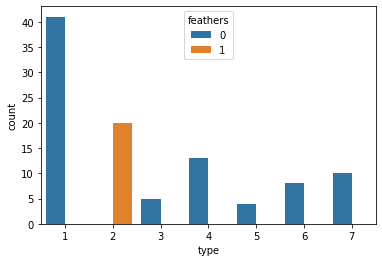

In [20]:
sns.countplot(x = zoo.type , hue = zoo.feathers)

<AxesSubplot:xlabel='type', ylabel='count'>

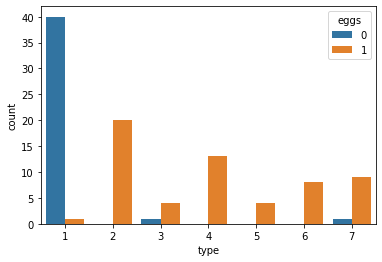

In [21]:
sns.countplot(x = zoo.type , hue = zoo.eggs)

<AxesSubplot:xlabel='type', ylabel='count'>

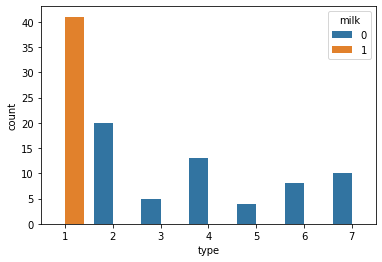

In [22]:
sns.countplot(x = zoo.type , hue = zoo.milk)

<AxesSubplot:xlabel='type', ylabel='count'>

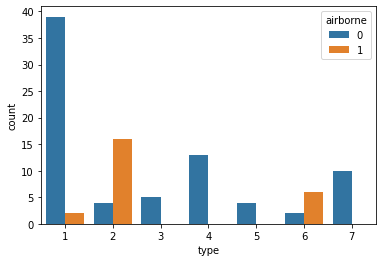

In [23]:
sns.countplot(x = zoo.type , hue = zoo.airborne)

<AxesSubplot:xlabel='type', ylabel='count'>

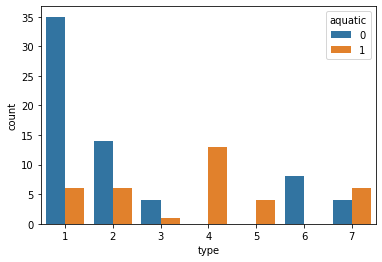

In [24]:
sns.countplot(x = zoo.type , hue = zoo.aquatic)

<AxesSubplot:xlabel='type', ylabel='count'>

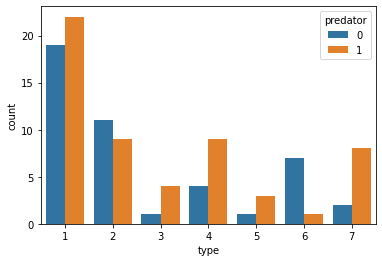

In [25]:
sns.countplot(x = zoo.type , hue = zoo.predator)

<AxesSubplot:xlabel='type', ylabel='count'>

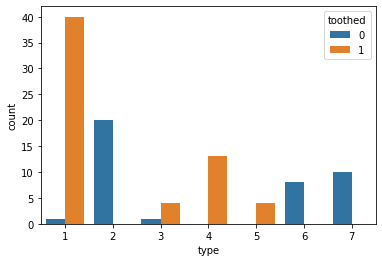

In [26]:
sns.countplot(x = zoo.type , hue = zoo.toothed)

<AxesSubplot:xlabel='type', ylabel='count'>

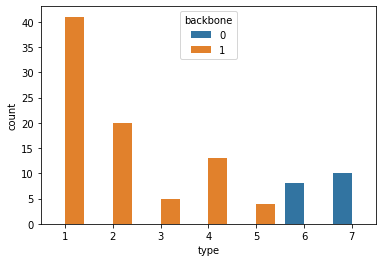

In [27]:
sns.countplot(x = zoo.type , hue = zoo.backbone)

<AxesSubplot:xlabel='type', ylabel='count'>

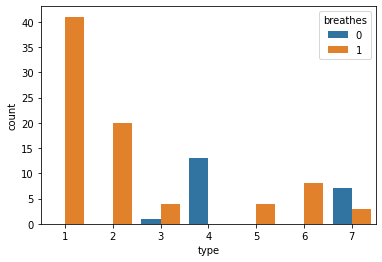

In [28]:
sns.countplot(x = zoo.type , hue = zoo.breathes)

<AxesSubplot:xlabel='type', ylabel='count'>

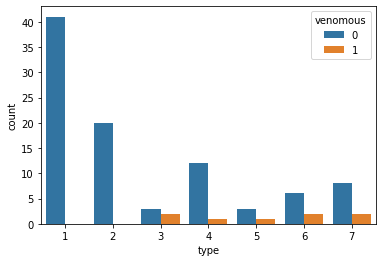

In [29]:
sns.countplot(x = zoo.type , hue = zoo.venomous)

<AxesSubplot:xlabel='type', ylabel='count'>

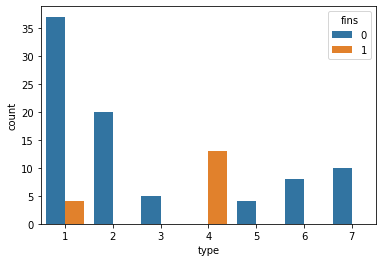

In [30]:
sns.countplot(x = zoo.type , hue = zoo.fins)

<AxesSubplot:xlabel='type', ylabel='count'>

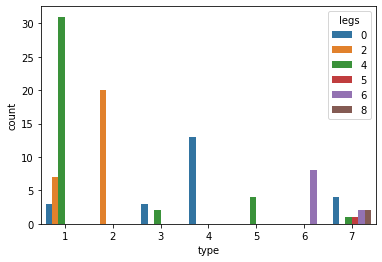

In [31]:
sns.countplot(x = zoo.type , hue = zoo.legs)

<AxesSubplot:xlabel='type', ylabel='count'>

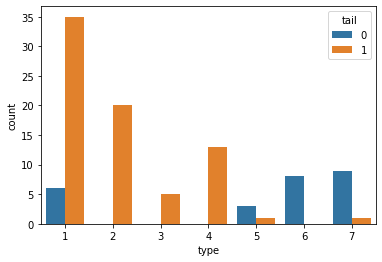

In [32]:
sns.countplot(x = 'type', data=zoo , hue='tail')

<AxesSubplot:xlabel='type', ylabel='count'>

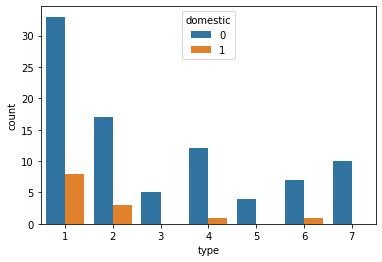

In [33]:
sns.countplot(x = zoo.type , hue = zoo.domestic)

<AxesSubplot:xlabel='type', ylabel='count'>

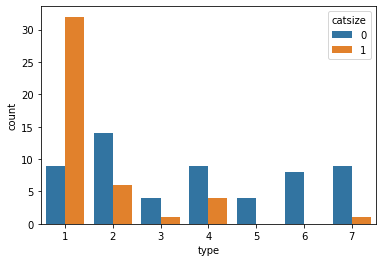

In [34]:
sns.countplot(x = zoo.type , hue = zoo.catsize)

In [35]:
zoo['tail'].value_counts()

1    75
0    26
Name: tail, dtype: int64

In [36]:
zoo.corr()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
hair,1.000000,-0.427851,-0.817382,0.878503,-0.198431,-0.473554,-0.154769,0.492531,0.191681,0.441149,-0.104245,-0.280313,0.394009,0.048973,0.207208,0.455020,-0.562384
feathers,-0.427851,1.000000,0.419248,-0.410761,0.656553,-0.058552,-0.104430,-0.613631,0.231403,0.254588,-0.145739,-0.223541,-0.206686,0.292569,0.031586,-0.135934,-0.197520
eggs,-0.817382,0.419248,1.000000,-0.938848,0.376646,0.376244,0.011605,-0.642150,-0.340420,-0.382777,0.098689,0.164796,-0.224918,-0.221090,-0.155610,-0.514650,0.661825
milk,0.878503,-0.410761,-0.938848,1.000000,-0.366765,-0.362613,-0.029721,0.628168,0.384958,0.423527,-0.242449,-0.156328,0.214196,0.210026,0.163928,0.574906,-0.723683
airborne,-0.198431,0.656553,0.376646,-0.366765,1.000000,-0.172638,-0.295181,-0.594311,-0.104718,0.286039,0.008528,-0.251157,0.043712,0.009482,0.063274,-0.349768,0.022677
aquatic,-0.473554,-0.058552,0.376244,-0.362613,-0.172638,1.000000,0.375978,0.053150,0.022463,-0.637506,0.087915,0.604492,-0.360638,-0.034642,-0.224308,-0.111866,0.326639
predator,-0.154769,-0.104430,0.011605,-0.029721,-0.295181,0.375978,1.000000,0.129452,0.051022,-0.262931,0.115391,0.190302,-0.099723,0.018947,-0.309794,0.144790,0.061179
toothed,0.492531,-0.613631,-0.642150,0.628168,-0.594311,0.053150,0.129452,1.000000,0.575085,-0.065690,-0.062344,0.364292,-0.193476,0.310368,0.069430,0.344010,-0.471527
backbone,0.191681,0.231403,-0.340420,0.384958,-0.104718,0.022463,0.051022,0.575085,1.000000,0.207666,-0.246611,0.209499,-0.432856,0.731762,0.101733,0.356976,-0.828845
breathes,0.441149,0.254588,-0.382777,0.423527,0.286039,-0.637506,-0.262931,-0.065690,0.207666,1.000000,-0.120752,-0.617219,0.369868,0.088952,0.124068,0.204125,-0.519308


<AxesSubplot:>

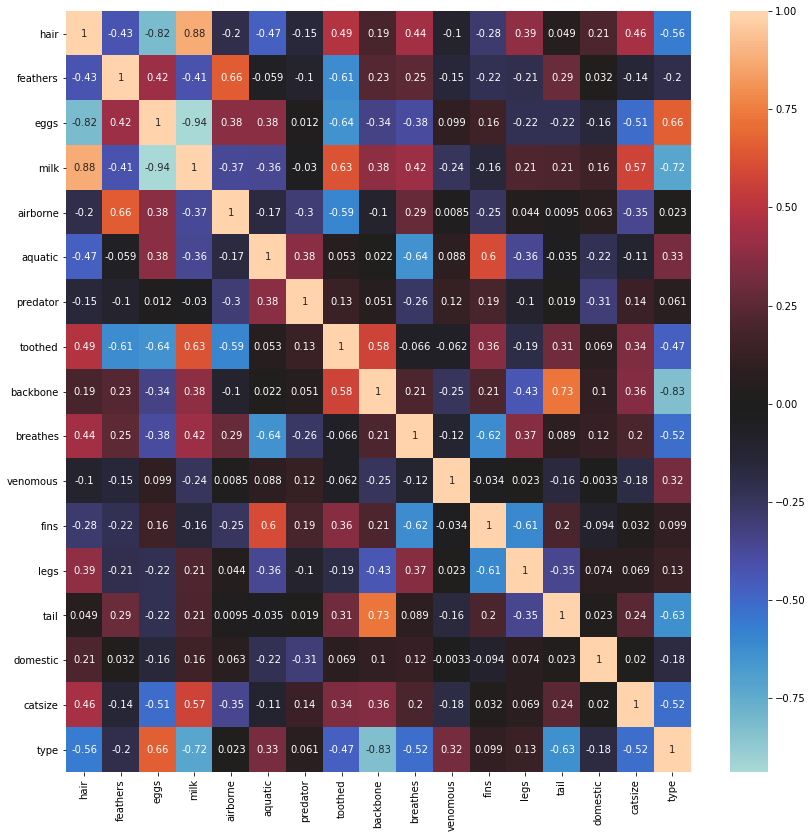

In [37]:
plt.subplots(figsize = (14,14))
sns.heatmap(zoo.corr(),center = 0 , annot = True)

# defining dependant and independant variable

In [38]:
X = zoo.drop('type' , axis =1)

In [39]:
X

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [40]:
Y = zoo.type

In [41]:
Y

0      1
1      1
2      4
3      1
4      1
      ..
96     1
97     6
98     1
99     7
100    2
Name: type, Length: 101, dtype: int64

# Split dataset into training set and test set

In [42]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.75,random_state=42) 

In [43]:
x_train.shape

(75, 16)

In [44]:
y_train.shape

(75,)

In [45]:
x_test.shape

(26, 16)

In [46]:
y_test.shape

(26,)

In [47]:
y_test

84    1
55    1
66    1
67    1
45    1
39    6
22    1
44    1
10    1
0     1
18    4
30    6
97    6
33    2
77    7
4     1
93    1
78    2
12    4
31    1
76    3
89    5
26    5
42    6
70    1
15    7
Name: type, dtype: int64

# finding best parameters for KNN using grid search

In [48]:
k_range = list(range(3, 100))
param_grid = dict(n_neighbors=k_range)

In [49]:
knn = KNeighborsClassifier()

In [50]:
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

In [51]:
grid_search=grid.fit(x_train,y_train)

C:\Users\Akshay\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Akshay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Akshay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Akshay\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\Akshay\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Akshay\ana

In [52]:
grid_search

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                         24, 25, 26, 27, 28, 29, 30, 31, 32, ...]},
             scoring='accuracy')

In [53]:
grid_search.best_params_

{'n_neighbors': 3}

In [54]:
grid_search.best_score_

0.8821428571428571

# The best score is observed when number of neighbors are taken as 3

# Building the model

In [55]:
knn = KNeighborsClassifier(n_neighbors=3)

In [56]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [57]:
knn.score(x_train,y_train)

0.9866666666666667

In [58]:
predict = knn.predict(x_test)

In [59]:
predict

array([1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 4, 6, 6, 2, 7, 1, 1, 2, 4, 1, 4, 5,
       5, 6, 1, 7], dtype=int64)

In [60]:
predictvals = pd.DataFrame({'actual vals':y_test,'predicted vals' : predict})

In [61]:
predictvals.shape

(26, 2)

In [62]:
predictvals

,actual vals,predicted vals
84,1,1
55,1,1
66,1,1
67,1,1
45,1,1
39,6,6
22,1,1
44,1,1
10,1,1
0,1,1


# testing accuracy

In [63]:
metrics.accuracy_score(y_test, predict)

0.9615384615384616

# confusion matrix

In [64]:
matrix = confusion_matrix(y_test, predict)
matrix

array([[13,  0,  0,  0,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  2,  0,  0,  0],
       [ 0,  0,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  0,  4,  0],
       [ 0,  0,  0,  0,  0,  0,  2]], dtype=int64)

# plotting the confusion matrix

Text(51.0, 0.5, 'True')

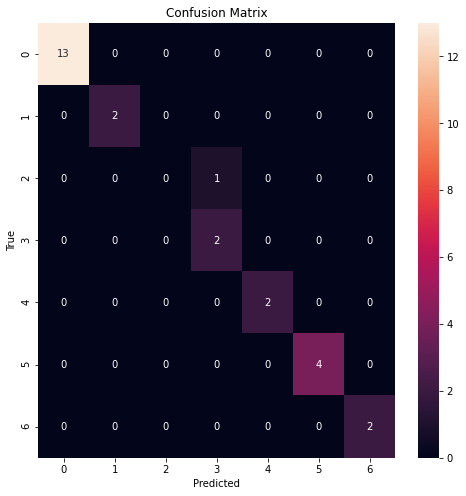

In [65]:
plt.subplots(figsize = (8,8))
sns.heatmap(matrix, annot=True,fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

# most animals are observed to be of type 1 followed by type 2
# least number of animals are observed to be of type 7
# features such as egg , milk and backbone mainly influence the type
# Features like eggs , milk and hair are highly correlated to each other
# most airborne animals have feathers , hence have a good correlation , same observed with aquatic animals and fins
# animals with a tail and backbone also seem to have good correlation
# an observation was misclassified as type 4 when it is actually 3